In [1]:
import numpy as np 
import pandas as pd 
import csv
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
import copy 
import warnings 
warnings.filterwarnings('ignore') 
from IPython.display import clear_output, Image, display 
import sys  
import re 

In [2]:
print("python:", sys.version)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("csv:", csv.__version__)
print("seaborn:", sns.__version__)

python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy: 1.20.3
pandas: 1.3.4
csv: 1.0
seaborn: 0.11.2


# Import the dataset and Load the dataset - Mcdonald dataset

In [3]:
mcdonald_df = pd.read_csv('Mcdonald .csv')

# Initial Galance of the dataset records ( head & tail)

In [4]:
mcdonald_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
mcdonald_df.tail(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


# Information about the dataset

In [6]:
print('Dimension of the dataset   ' + str(mcdonald_df.shape))

Dimension of the dataset   (260, 24)


In [7]:
print ('Size of the dataset    ' + str(mcdonald_df.size))

Size of the dataset    6240


In [8]:
mcdonald_df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [9]:
mcdonald_df.dtypes.value_counts() 

int64      18
object      3
float64     3
dtype: int64

In [10]:
print (mcdonald_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

# Check for missing values

In [11]:
print(mcdonald_df.isnull().sum().sum())

0


In [12]:
mcdonald_df.count()

Category                         260
Item                             260
Serving Size                     260
Calories                         260
Calories from Fat                260
Total Fat                        260
Total Fat (% Daily Value)        260
Saturated Fat                    260
Saturated Fat (% Daily Value)    260
Trans Fat                        260
Cholesterol                      260
Cholesterol (% Daily Value)      260
Sodium                           260
Sodium (% Daily Value)           260
Carbohydrates                    260
Carbohydrates (% Daily Value)    260
Dietary Fiber                    260
Dietary Fiber (% Daily Value)    260
Sugars                           260
Protein                          260
Vitamin A (% Daily Value)        260
Vitamin C (% Daily Value)        260
Calcium (% Daily Value)          260
Iron (% Daily Value)             260
dtype: int64

# Additional Information about the dataset , useful analysis

In [13]:
mcdonald_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


In [14]:
mcdonald_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,260,9,Coffee & Tea,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,260,260,Egg McMuffin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Serving Size,260,107,16 fl oz cup,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,260.0,NaN,NaN,NaN,368.269231,240.269886,0.0,210.0,340.0,500.0,1880.0
Calories from Fat,260.0,NaN,NaN,NaN,127.096154,127.875914,0.0,20.0,100.0,200.0,1060.0
Total Fat,260.0,NaN,NaN,NaN,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,NaN,NaN,NaN,21.815385,21.885199,0.0,3.75,17.0,35.0,182.0
Saturated Fat,260.0,NaN,NaN,NaN,6.007692,5.321873,0.0,1.0,5.0,10.0,20.0
Saturated Fat (% Daily Value),260.0,NaN,NaN,NaN,29.965385,26.639209,0.0,4.75,24.0,48.0,102.0
Trans Fat,260.0,NaN,NaN,NaN,0.203846,0.429133,0.0,0.0,0.0,0.0,2.5


In [15]:
mcdonald_df.duplicated().sum() #checking duplicates

0

# Information about the dataset - Object Type - Categorical Variable - Unique

In [16]:
print(mcdonald_df['Category'].unique())

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']


In [17]:
print(mcdonald_df['Item'].unique())

['Egg McMuffin' 'Egg White Delight' 'Sausage McMuffin'
 'Sausage McMuffin with Egg' 'Sausage McMuffin with Egg Whites'
 'Steak & Egg McMuffin' 'Bacon, Egg & Cheese Biscuit (Regular Biscuit)'
 'Bacon, Egg & Cheese Biscuit (Large Biscuit)'
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)'
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)'
 'Sausage Biscuit (Regular Biscuit)' 'Sausage Biscuit (Large Biscuit)'
 'Sausage Biscuit with Egg (Regular Biscuit)'
 'Sausage Biscuit with Egg (Large Biscuit)'
 'Sausage Biscuit with Egg Whites (Regular Biscuit)'
 'Sausage Biscuit with Egg Whites (Large Biscuit)'
 'Southern Style Chicken Biscuit (Regular Biscuit)'
 'Southern Style Chicken Biscuit (Large Biscuit)'
 'Steak & Egg Biscuit (Regular Biscuit)' 'Bacon, Egg & Cheese McGriddles'
 'Bacon, Egg & Cheese McGriddles with Egg Whites' 'Sausage McGriddles'
 'Sausage, Egg & Cheese McGriddles'
 'Sausage, Egg & Cheese McGriddles with Egg Whites'
 'Bacon, Egg & Cheese Bagel' 'Baco

# 1.Plot graphically which food categories have the highest and lowest varieties

In [18]:
food_categories = mcdonald_df.groupby('Category').count()
food_categories_count = food_categories[['Item']].sort_values('Item',ascending= False)
food_categories_count

,Item
Category,
Coffee & Tea,95
Breakfast,42
Smoothies & Shakes,28
Beverages,27
Chicken & Fish,27
Beef & Pork,15
Snacks & Sides,13
Desserts,7
Salads,6


<AxesSubplot:ylabel='Category'>

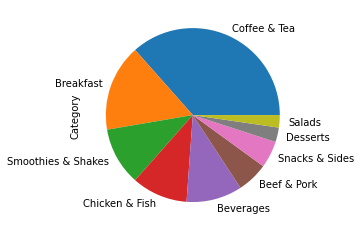

In [19]:
#Create a pie chart that includes the relative proportions of each cateogry of food (Pie chart for the "Category" column using the value_counts() method.
mcdonald_df.Category.value_counts().plot.pie()

[Text(0, 0, 'Breakfast'),
 Text(1, 0, 'Beef & Pork'),
 Text(2, 0, 'Chicken & Fish'),
 Text(3, 0, 'Salads'),
 Text(4, 0, 'Snacks & Sides'),
 Text(5, 0, 'Desserts'),
 Text(6, 0, 'Beverages'),
 Text(7, 0, 'Coffee & Tea'),
 Text(8, 0, 'Smoothies & Shakes')]

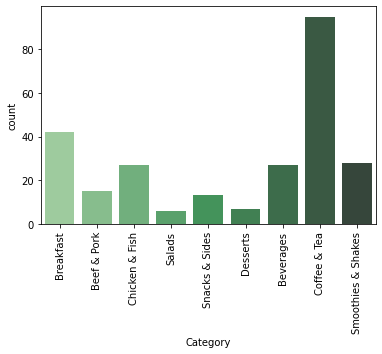

In [20]:
g = sns.countplot(x="Category", data=mcdonald_df, palette="Greens_d");
g.set_xticklabels(g.get_xticklabels(), rotation=90) # Count plot for meal categories

# 2. Which all variables have an outlier?

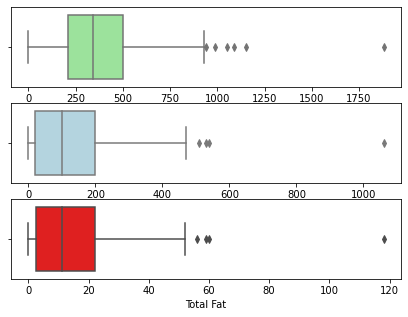

In [21]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Calories'], color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Calories from Fat'], color='lightblue')
#plt.title('Calories from Fat')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Total Fat'], color='red')

plt.show()

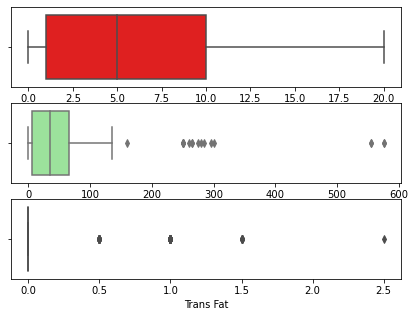

In [22]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Saturated Fat'], color='red')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Cholesterol'], color='lightgreen')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Trans Fat'], color='red')


plt.show()

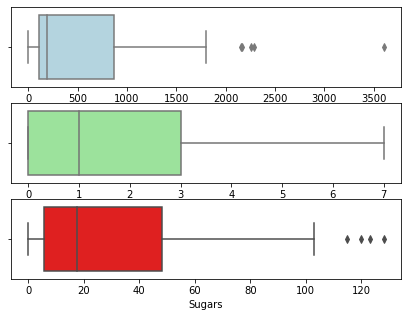

In [23]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Sodium'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Dietary Fiber'], color='lightgreen')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Sugars'], color='red')


plt.show()

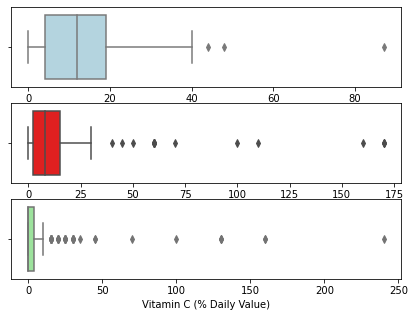

In [24]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Protein'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Vitamin A (% Daily Value)'], color='red')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Vitamin C (% Daily Value)'], color='lightgreen')


plt.show()

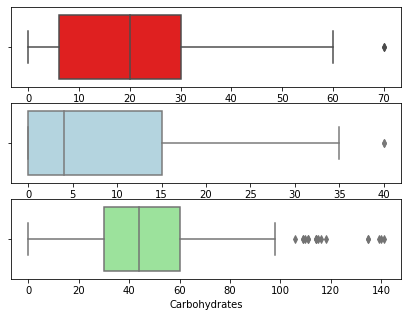

In [25]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Calcium (% Daily Value)'], color='red')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Iron (% Daily Value)'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Carbohydrates'], color='lightgreen')


plt.show()

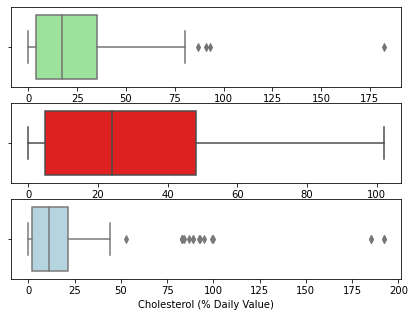

In [26]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Total Fat (% Daily Value)'], color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Saturated Fat (% Daily Value)'], color='red')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Cholesterol (% Daily Value)'], color='lightblue')


plt.show()

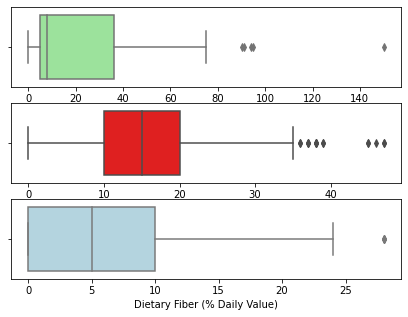

In [27]:
plt.figure(figsize= (7,5))
plt.subplot(3,1,1)
sns.boxplot(x= mcdonald_df['Sodium (% Daily Value)'], color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(x= mcdonald_df['Carbohydrates (% Daily Value)'], color='red')

plt.subplot(3,1,3)
sns.boxplot(x= mcdonald_df['Dietary Fiber (% Daily Value)'], color='lightblue')


plt.show()

# 3.Which variables have the highest correlation? Plot them and find out the value?
# sns.pairplot(mcdonald_df) #pairplot
# plt.show()

In [28]:
mcdonald_df.corr()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,0.846624,...,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,0.846158,...,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,0.846728,...,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.712309,0.846624,0.846158,0.846728,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,...,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


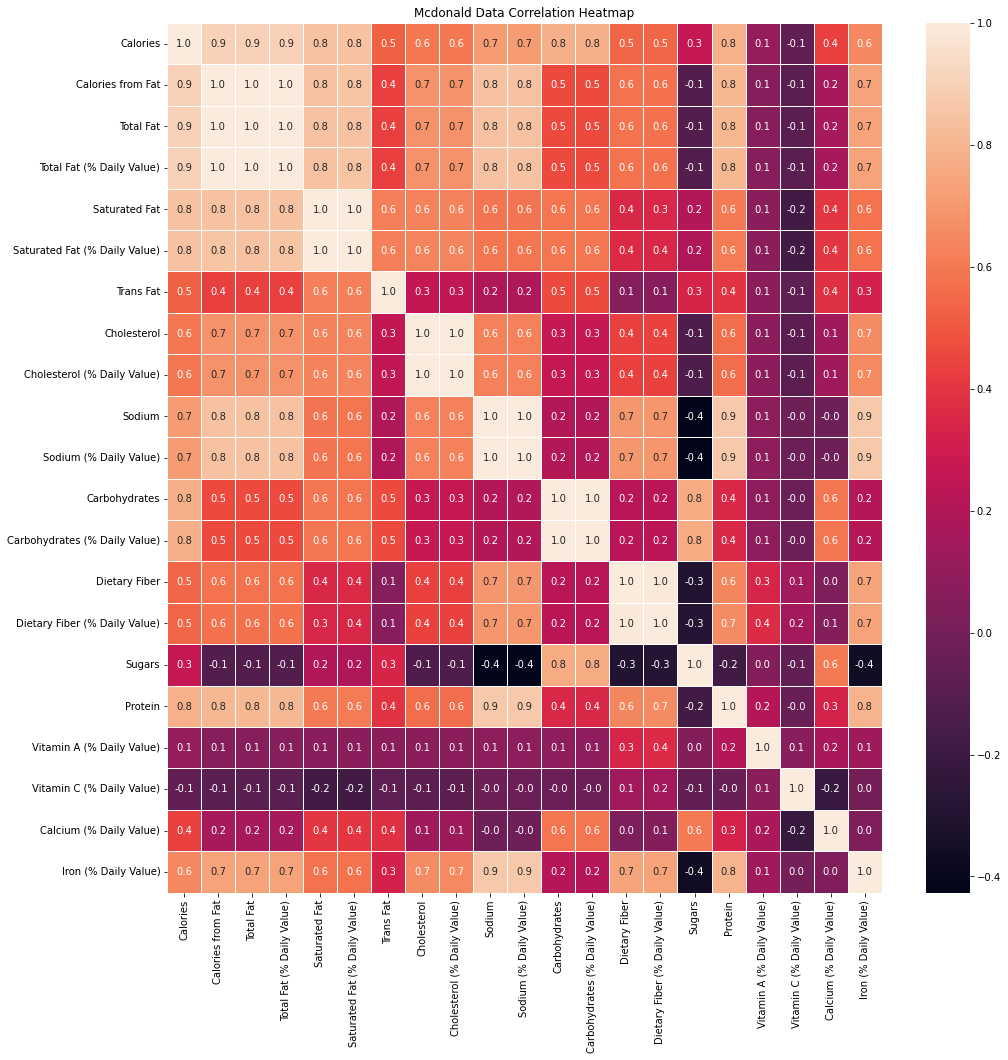

In [29]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(mcdonald_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Mcdonald Data Correlation Heatmap")
plt.show()

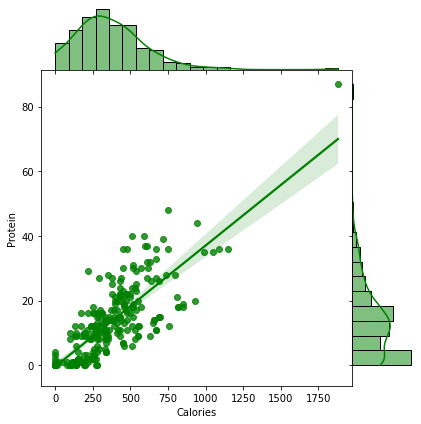

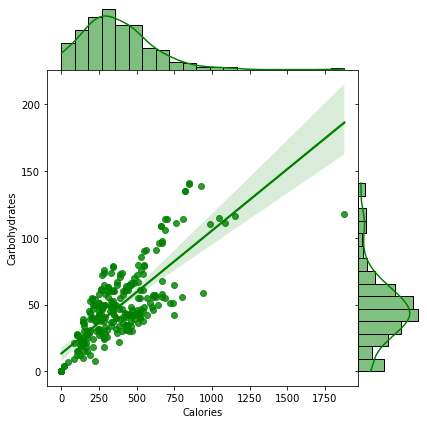

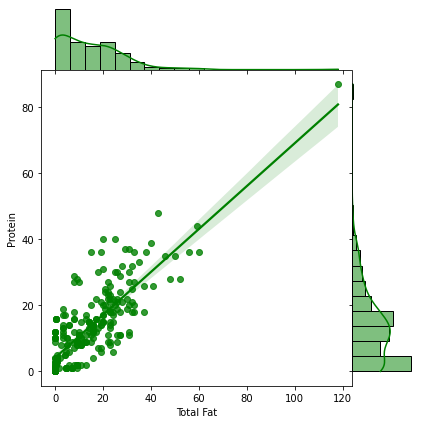

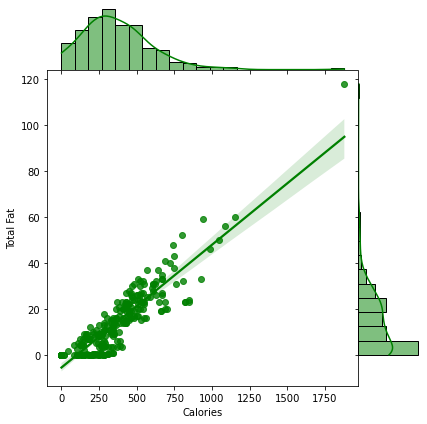

In [30]:
sns.jointplot(x= "Calories", y = "Protein", data = mcdonald_df,  kind="reg", space=0, color="g")
sns.jointplot(x= "Calories", y = "Carbohydrates", data = mcdonald_df,  kind="reg", space=0, color="g")
sns.jointplot(x= "Total Fat", y = "Protein", data = mcdonald_df,  kind="reg", space=0, color="g") 
sns.jointplot(x= "Calories", y = "Total Fat",data = mcdonald_df,  kind="reg", space=0, color="g")

# Additional Analysis from the data

In [31]:
# Highest Items 
print('Highest Calorie meal: {} \n\
       Highest Fat meal: {} \n\
       Highest Cholesterol meal: {} \n\
       Highest Sodium meal: {} \n\
       Highest Sugar meal: {} \n\
       Highest Carb meal: {}'.format(mcdonald_df.Item[mcdonald_df['Calories'].idxmax()],\
                                     mcdonald_df.Item[mcdonald_df['Total Fat'].idxmax()],\
                                     mcdonald_df.Item[mcdonald_df['Cholesterol'].idxmax()],\
                                     mcdonald_df.Item[mcdonald_df['Sodium'].idxmax()],\
                                     mcdonald_df.Item[mcdonald_df['Sugars'].idxmax()],\
                                     mcdonald_df.Item[mcdonald_df['Carbohydrates'].idxmax()]))

Highest Calorie meal: Chicken McNuggets (40 piece) 
       Highest Fat meal: Chicken McNuggets (40 piece) 
       Highest Cholesterol meal: Big Breakfast with Hotcakes (Regular Biscuit) 
       Highest Sodium meal: Chicken McNuggets (40 piece) 
       Highest Sugar meal: McFlurry with M&M’s Candies (Medium) 
       Highest Carb meal: Chocolate Shake (Large)


Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64


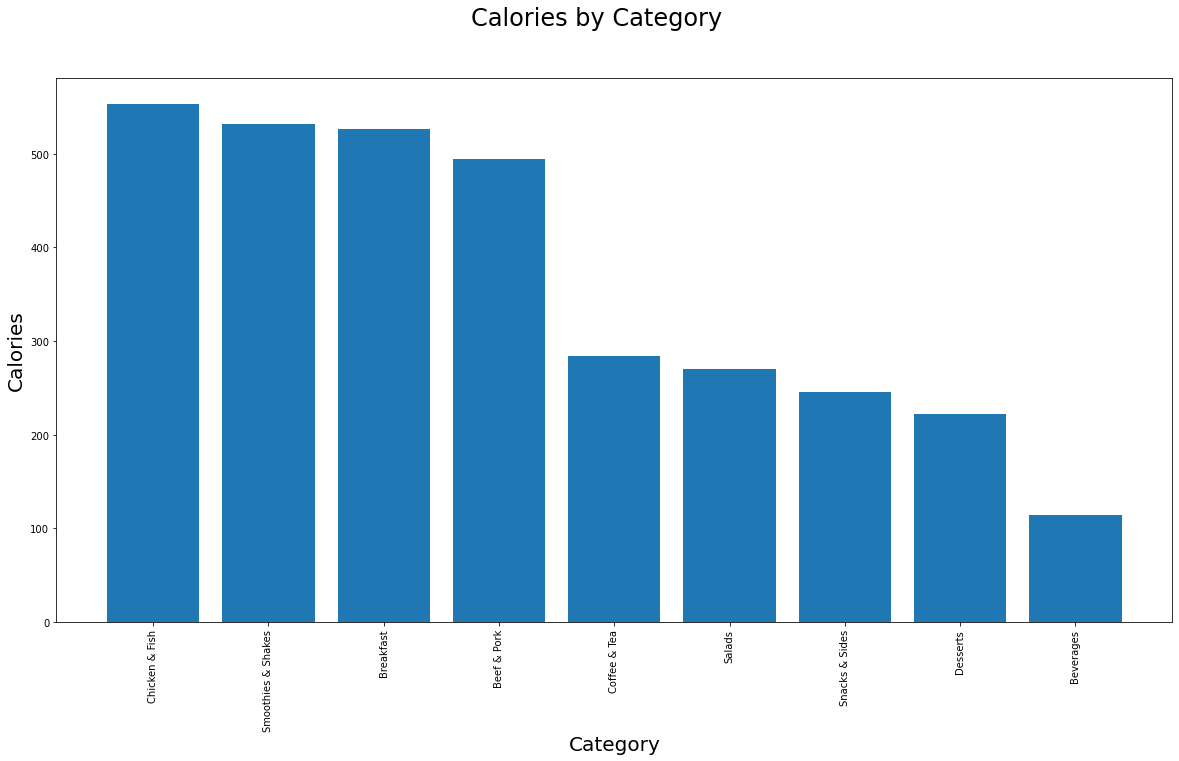

In [32]:
# How many items are there in category
Calories = mcdonald_df.drop('Item', axis = 1)
Calories = mcdonald_df.groupby(["Category"])["Calories"].mean()
Calories = Calories.sort_values(ascending=False)
print(Calories)


Category = ['Chicken & Fish', 'Smoothies & Shakes', 'Breakfast',
'Beef & Pork', 'Coffee & Tea', 'Salads', 'Snacks & Sides','Desserts','Beverages']

plt.figure(figsize = (20,10))
plt.suptitle('Calories by Category', fontsize = 24)
plt.xlabel('Category', fontsize = 20)
plt.ylabel("Calories", fontsize = 20)
plt.bar(Category, Calories)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Category'>

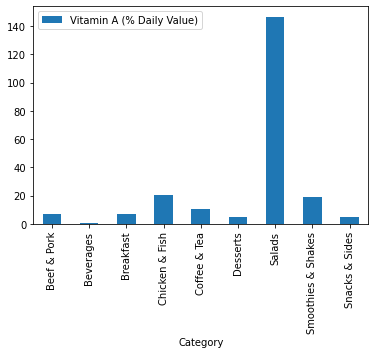

In [33]:
mcdonald_df.pivot_table('Vitamin A (% Daily Value)', 'Category').plot(kind='bar', stacked=True) # For vitamin A checks

<AxesSubplot:xlabel='Category'>

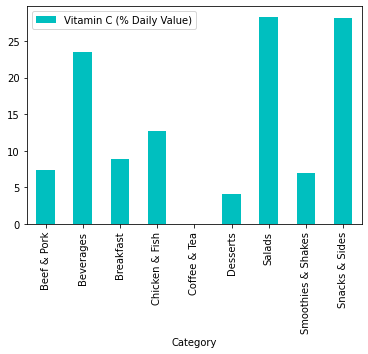

In [34]:
mcdonald_df.pivot_table('Vitamin C (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'c')# For vitaminC checks

<AxesSubplot:xlabel='Category'>

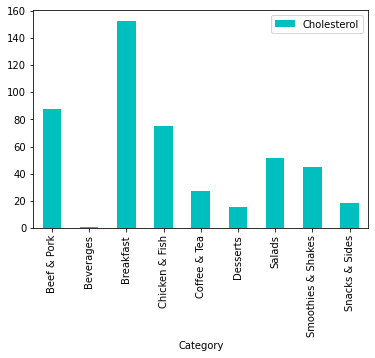

In [35]:
mcdonald_df.pivot_table('Cholesterol', 'Category').plot(kind='bar', stacked=True, color = 'c') # For cholesterol checks

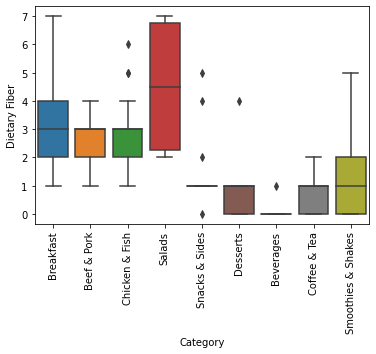

In [36]:
# Boxplot for Dietary Fiber
sns.boxplot(data= mcdonald_df, x = 'Category',y = 'Dietary Fiber')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Category'>

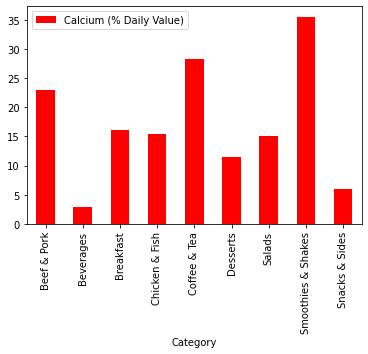

In [37]:
mcdonald_df.pivot_table('Calcium (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'r') # Calcium Checks

<AxesSubplot:xlabel='Category'>

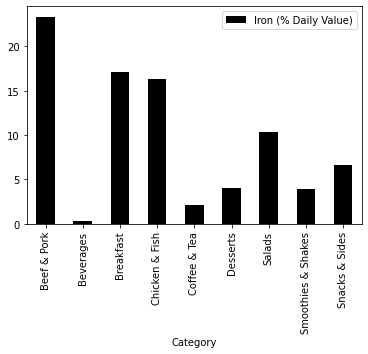

In [38]:
mcdonald_df.pivot_table('Iron (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'k') # Iron checks

<AxesSubplot:xlabel='Category'>

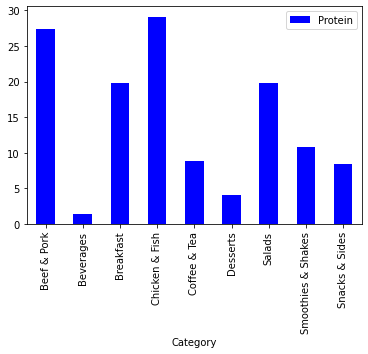

In [39]:
mcdonald_df.pivot_table('Protein', 'Category').plot(kind='bar', stacked=True, color = 'b') # Protein Checks

<AxesSubplot:xlabel='Category'>

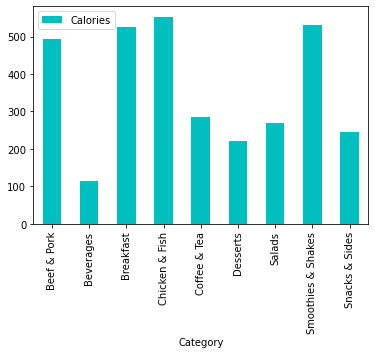

In [40]:
mcdonald_df.pivot_table('Calories', 'Category').plot(kind='bar', stacked=True, color = 'c') # Calories Checks

368.2692307692308
340.0


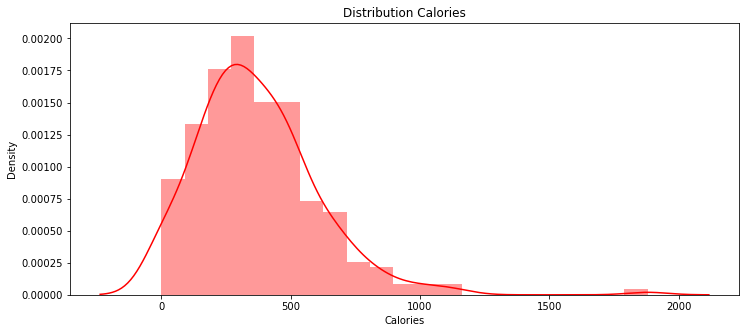

In [41]:
# Distribution For Calories, Sugars
plt.figure(figsize=(12,5))
plt.title("Distribution Calories")
ax = sns.distplot(mcdonald_df["Calories"], color = 'r')

print(mcdonald_df.Calories.mean())
print(mcdonald_df.Calories.median())

29.423076923076923
17.5


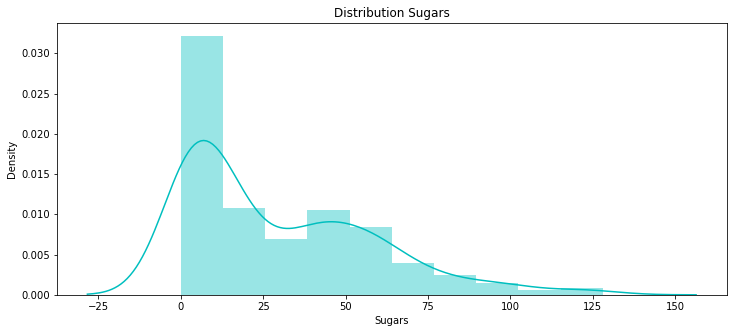

In [42]:
plt.figure(figsize=(12,5))
plt.title("Distribution Sugars")
ax = sns.distplot(mcdonald_df["Sugars"], color = 'c')


print(mcdonald_df.Sugars.mean())
print(mcdonald_df.Sugars.median())

In [43]:
# Checking the sugars in Category
def plot(grouped):
    item = grouped["Item"].sum()
    item_list = item.sort_index()
    item_list = item_list[-20:]
    plt.figure(figsize=(9,10))
    graph = sns.barplot(item_list.index,item_list.values)
    labels = [aj.get_text()[-40:] for aj in graph.get_yticklabels()]
    graph.set_yticklabels(labels)

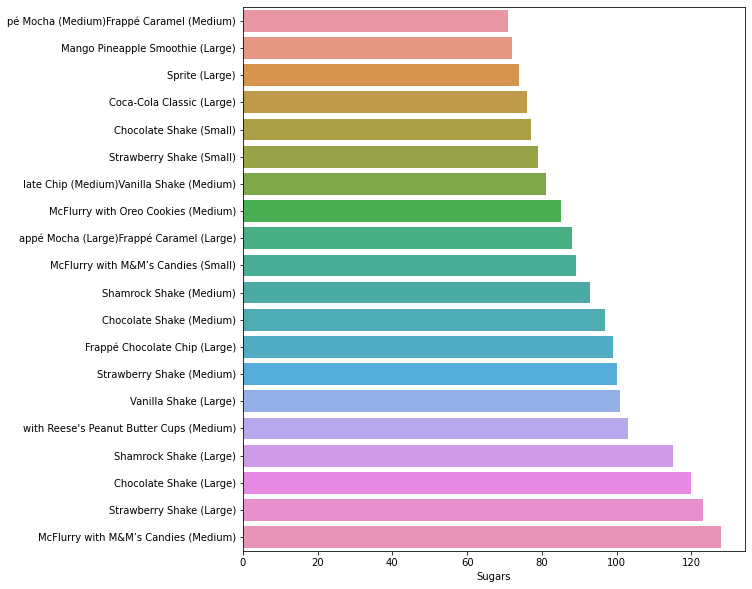

In [44]:
sugar = mcdonald_df.groupby(mcdonald_df["Sugars"])
plot(sugar)

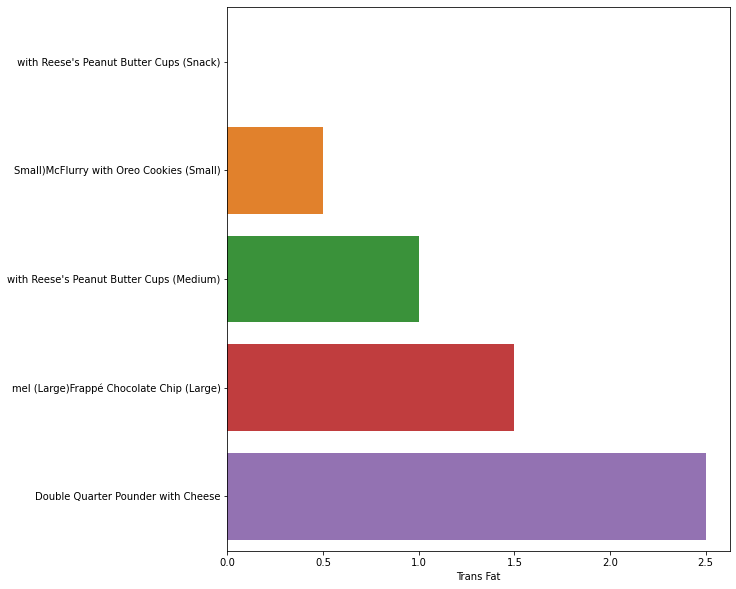

In [45]:
fats = mcdonald_df.groupby(mcdonald_df["Trans Fat"])
plot(fats)

In [46]:
mcdonald_df.loc[mcdonald_df.Sugars.idxmax() ].Item

'McFlurry with M&M’s Candies (Medium)'

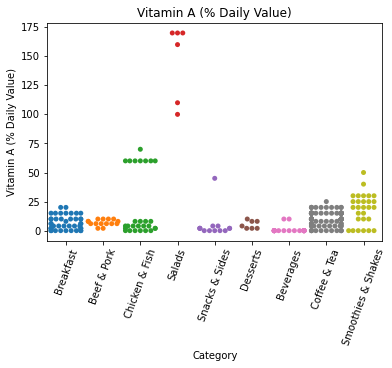

In [47]:
# Swarmplot for Vitamins, protein, Iron , Vitamin C, calories, calicum, Cholesterol, Trans Fat and Sugars
plot = sns.swarmplot(x="Category", y="Vitamin A (% Daily Value)", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Vitamin A (% Daily Value)")
plt.show()

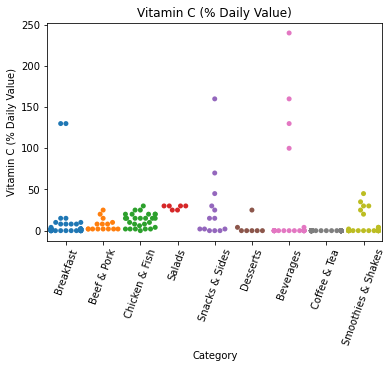

In [48]:
plot = sns.swarmplot(x="Category", y="Vitamin C (% Daily Value)", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Vitamin C (% Daily Value)")
plt.show()

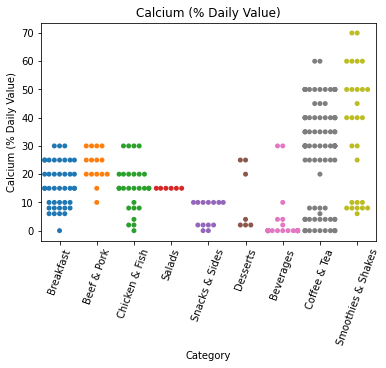

In [49]:
plot = sns.swarmplot(x="Category", y="Calcium (% Daily Value)", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Calcium (% Daily Value)")
plt.show()

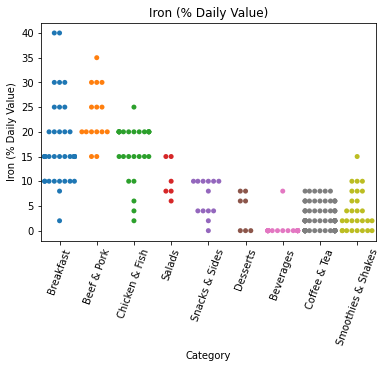

In [50]:
plot = sns.swarmplot(x="Category", y="Iron (% Daily Value)", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Iron (% Daily Value)")
plt.show()

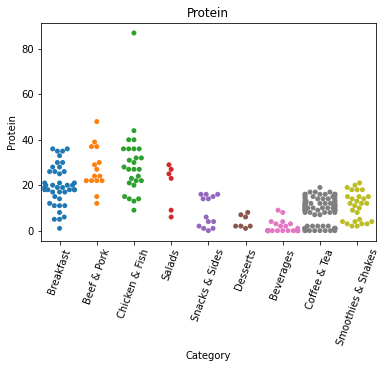

In [51]:
plot = sns.swarmplot(x="Category", y="Protein", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Protein")
plt.show()

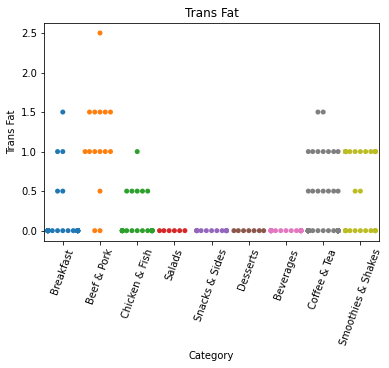

In [52]:
plot = sns.swarmplot(x="Category", y="Trans Fat", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Trans Fat")
plt.show()

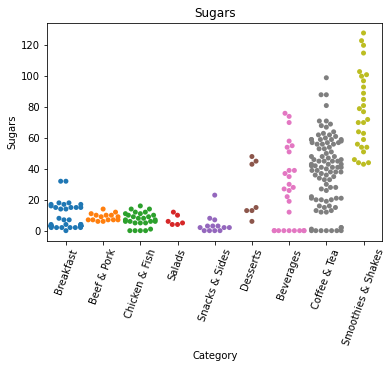

In [53]:
plot = sns.swarmplot(x="Category", y="Sugars", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Sugars")
plt.show()

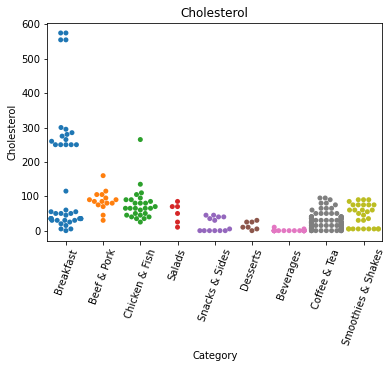

In [54]:
plot = sns.swarmplot(x="Category", y="Cholesterol", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Cholesterol")
plt.show()

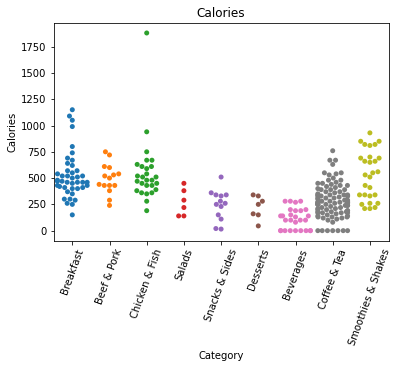

In [55]:
plot = sns.swarmplot(x="Category", y="Calories", data=mcdonald_df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Calories")
plt.show()

In [56]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (3 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

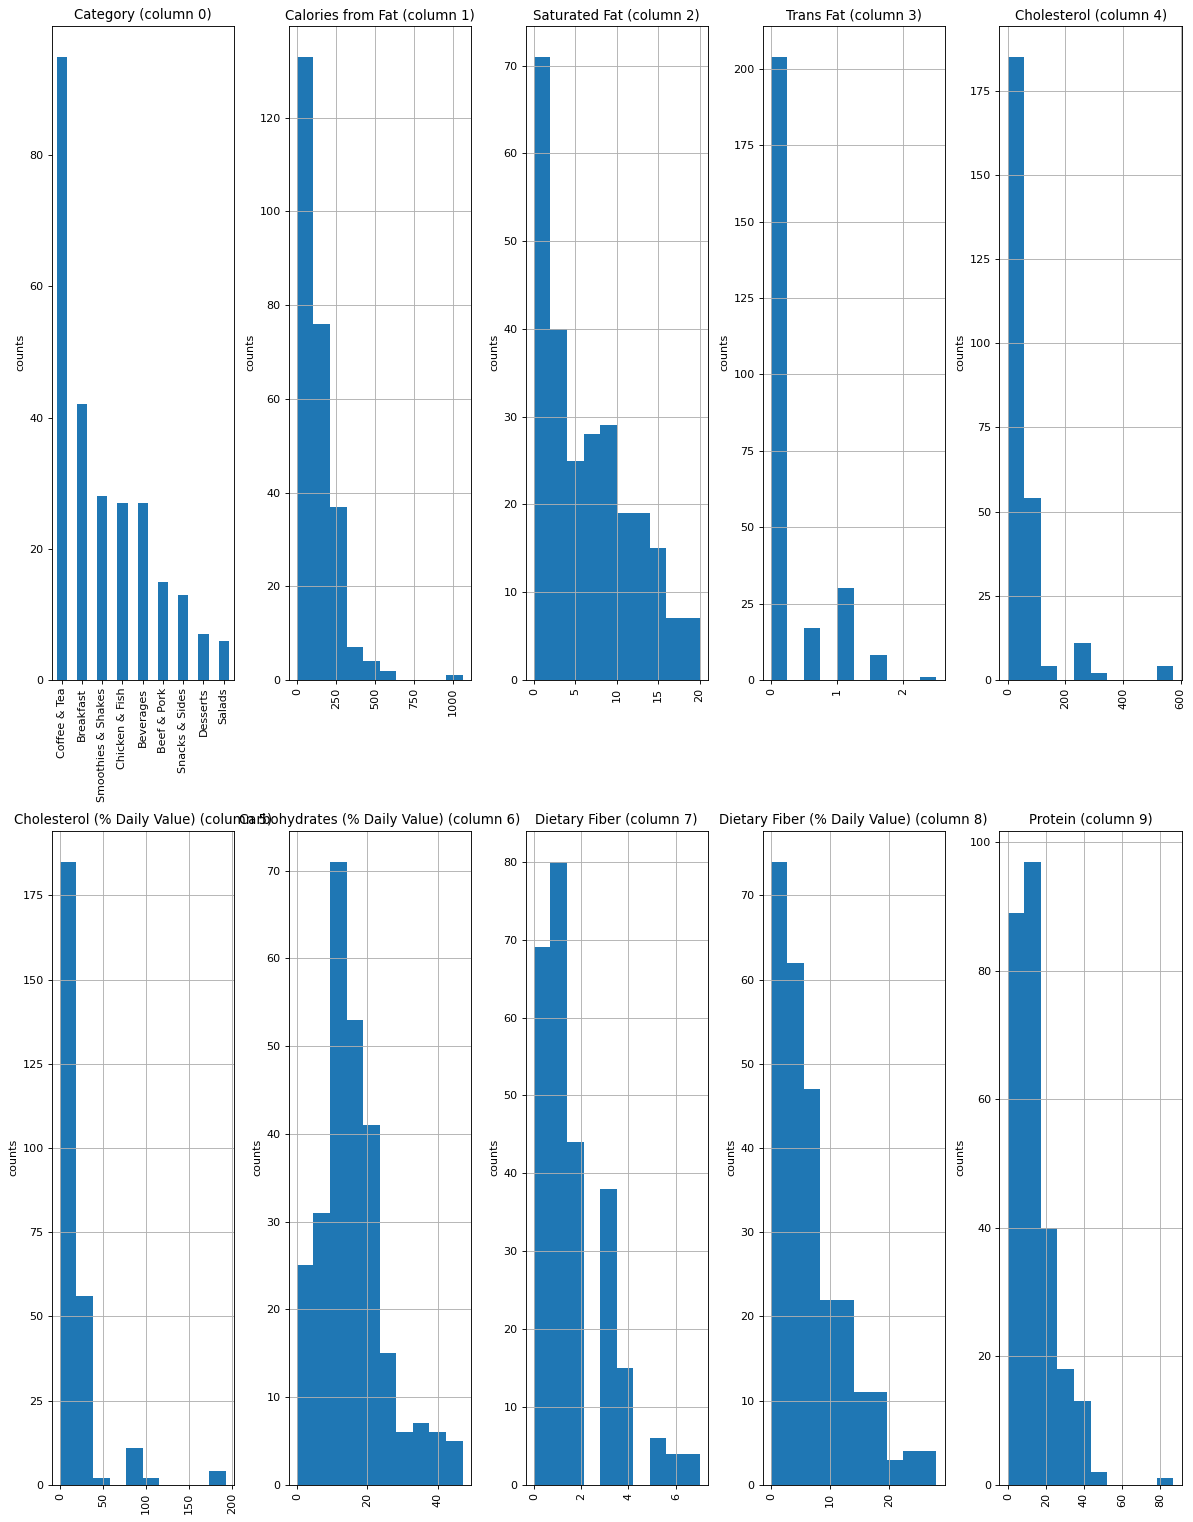

In [57]:
plotPerColumnDistribution(mcdonald_df, 10, 5) #Distribution graphs (histogram/bar graph) of sampled columns:

# One hot Encoding

In [58]:
mcdonald_df['Category'].value_counts()
mcdonald_df['Item'].value_counts()

Egg McMuffin                                        1
Nonfat Latte (Small)                                1
Nonfat Latte (Large)                                1
Nonfat Caramel Latte (Small)                        1
Nonfat Caramel Latte (Medium)                       1
                                                   ..
Chipotle BBQ Snack Wrap (Grilled Chicken)           1
Honey Mustard Snack Wrap (Crispy Chicken)           1
Honey Mustard Snack Wrap (Grilled Chicken)          1
Ranch Snack Wrap (Crispy Chicken)                   1
McFlurry with Reese's Peanut Butter Cups (Snack)    1
Name: Item, Length: 260, dtype: int64

In [59]:
mcdonald_df = pd.get_dummies(mcdonald_df, columns = ['Category'])
print(mcdonald_df)

                                                  Item     Serving Size  \
0                                         Egg McMuffin   4.8 oz (136 g)   
1                                    Egg White Delight   4.8 oz (135 g)   
2                                     Sausage McMuffin   3.9 oz (111 g)   
3                            Sausage McMuffin with Egg   5.7 oz (161 g)   
4                     Sausage McMuffin with Egg Whites   5.7 oz (161 g)   
..                                                 ...              ...   
255                 McFlurry with Oreo Cookies (Small)  10.1 oz (285 g)   
256                McFlurry with Oreo Cookies (Medium)  13.4 oz (381 g)   
257                 McFlurry with Oreo Cookies (Snack)   6.7 oz (190 g)   
258  McFlurry with Reese's Peanut Butter Cups (Medium)  14.2 oz (403 g)   
259   McFlurry with Reese's Peanut Butter Cups (Snack)   7.1 oz (202 g)   

     Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0         300            

In [60]:
mcdonald_df.head()

,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Iron (% Daily Value),Category_Beef & Pork,Category_Beverages,Category_Breakfast,Category_Chicken & Fish,Category_Coffee & Tea,Category_Desserts,Category_Salads,Category_Smoothies & Shakes,Category_Snacks & Sides
0,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,...,15,0,0,1,0,0,0,0,0,0
1,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,...,8,0,0,1,0,0,0,0,0,0
2,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,...,10,0,0,1,0,0,0,0,0,0
3,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,...,15,0,0,1,0,0,0,0,0,0
4,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,...,10,0,0,1,0,0,0,0,0,0


In [61]:
del mcdonald_df["Item"]

In [62]:
del mcdonald_df["Serving Size"]

In [63]:
# As the columns we specified have no correlation with the target columns so we can drop them..
#As there are mutliple values in these column and we can also see from the Heatmap 
# so that these columns have less correlation with that targe column. 

In [64]:
mcdonald_df.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Iron (% Daily Value),Category_Beef & Pork,Category_Beverages,Category_Breakfast,Category_Chicken & Fish,Category_Coffee & Tea,Category_Desserts,Category_Salads,Category_Smoothies & Shakes,Category_Snacks & Sides
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,15,0,0,1,0,0,0,0,0,0
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,8,0,0,1,0,0,0,0,0,0
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,10,0,0,1,0,0,0,0,0,0
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,15,0,0,1,0,0,0,0,0,0
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,10,0,0,1,0,0,0,0,0,0


### Defining Independent and Target column

In [65]:
#Specifying Independent and Dependent (Target) variable..
# x variable containing all the features
x=mcdonald_df.drop(['Calories'],axis=1)
# y varaible containg only the target variable
y=mcdonald_df['Calories']

### Splitting the Data

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

# Model Building

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [69]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_mean_squared_error)

R_Squared = r2_score(ytest,ypredtest)
print('R Squared:',R_Squared)

Adj_RSquared = 1- ((1-R_Squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

Mean absolute error: 4.569023081671166
Mean squared error: 32.29265713481474
Root Mean squared error: 5.6826628559870365
R Squared: 0.9994850321830874
Adj.R Squared: 0.9991739057937027


In [70]:
# Training data evaluation
ypredtrain = lin_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_mean_squared_error)

R_Squared = r2_score(ytrain,ypredtrain)
print('R Squared:',R_Squared)

Adj_RSquared = 1- ((1-R_Squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

Mean absolute error: 2.7484352615264656
Mean squared error: 12.197328057811994
Root Mean squared error: 3.4924673309584433
R Squared: 0.9997788347332648
Adj.R Squared: 0.9997366387284271


# Random_Forest Regressor..

In [71]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [72]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(xtrain, ytrain)

In [73]:
# Testing data evaluation
ypredtest = rf.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_mean_squared_error)

R_Squared = r2_score(ytest,ypredtest)
print('R Squared:',R_Squared)

Adj_RSquared = 1- ((1-R_Squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

Mean absolute error: 33.57696306987712
Mean squared error: 2186.9450118831132
Root Mean squared error: 46.76478388577363
R Squared: 0.9651250036881224
Adj.R Squared: 0.9440546934163629


In [74]:
# Training data evaluation
ypredtrain = rf.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_mean_squared_error)

R_Squared = r2_score(ytrain,ypredtrain)
print('R Squared:',R_Squared)

Adj_RSquared = 1- ((1-R_Squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

Mean absolute error: 23.44585432769058
Mean squared error: 1553.7170733650948
Root Mean squared error: 39.41721798104345
R Squared: 0.9718275798328042
Adj.R Squared: 0.9664525786166945


### SVM Regressor

In [75]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(xtrain, ytrain)

SVR()

**most important SVR parameter is Kernel type.
It can be #linear,polynomial or gaussian ,rbf kernel.. 
We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.

In [76]:
# Testing data evaluation
ypredtest = regressor.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_mean_squared_error)

R_Squared = r2_score(ytest,ypredtest)
print('R Squared:',R_Squared)

Adj_RSquared = 1- ((1-R_Squared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

Mean absolute error: 176.96952122483282
Mean squared error: 57707.35436589602
Root Mean squared error: 240.2235508144362
R Squared: 0.07974651409003652
Adj.R Squared: -0.47623996698056636


In [77]:
# Training data evaluation
ypredtrain = regressor.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean absolute error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print('Root Mean squared error:',Root_mean_squared_error)

R_Squared = r2_score(ytrain,ypredtrain)
print('R Squared:',R_Squared)

Adj_RSquared = 1- ((1-R_Squared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('Adj.R Squared:',Adj_RSquared)

Mean absolute error: 155.512686323211
Mean squared error: 49476.2693052339
Root Mean squared error: 222.43261744904657
R Squared: 0.10288284072627452
Adj.R Squared: -0.06827766992463369
